### Gymnasium links

Announce: https://farama.org/Announcing-The-Farama-Foundation

Github: https://github.com/Farama-Foundation/Gymnasium

Documentation: https://gymnasium.farama.org/

# Deep Crossentropy method

In this section we'll extend your CEM implementation with neural networks! You will train a multi-layer neural network to solve simple continuous state space games. __Please make sure you're done with tabular crossentropy method from the previous notebook.__


In [1]:
# !pip install gymnasium
# !pip install 'gymnasium[toy_text]'
# !pip install 'gymnasium[classic_control]'
# !pip install 'gymnasium[box2d]'

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

from utils import generate_session, select_elites, show_progress, make_batches
%matplotlib inline

state vector dim = 4
n_actions = 2


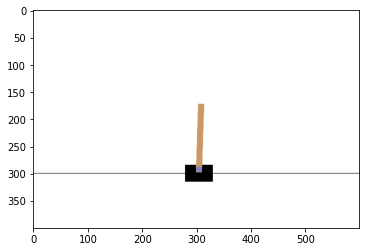

In [3]:
# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v1", render_mode="rgb_array").env
env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

plt.imshow(env.render())
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close()

In [4]:
env.observation_space, env.action_space

(Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32),
 Discrete(2))

# Neural Network Policy

For this assignment we'll utilize the simplified neural network implementation from __[Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__. Here's what you'll need:

* `agent.partial_fit(states, actions)` - make a single training pass over the data. Maximize the probabilitity of :actions: from :states:
* `agent.predict_proba(states)` - predict probabilities of all actions, a matrix of shape __[len(states), n_actions]__

You may also use your favorite neural framework, if it doesn't make it too difficult. The idea is the main thing.

In [5]:
from sklearn.neural_network import MLPClassifier

agent = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    activation='tanh',
)

# initialize agent to the dimension of state space and number of actions
agent.partial_fit([env.reset()[0]] * n_actions, range(n_actions), range(n_actions))

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20))

In [6]:
dummy_states, dummy_actions, dummy_reward = generate_session(env, n_actions, agent, t_max=5)
print("states:", np.stack(dummy_states))
print("actions:", dummy_actions)
print("reward:", dummy_reward)

states: [[ 0.01413726 -0.02535818 -0.00863435  0.00456412]
 [ 0.01363009 -0.22035524 -0.00854307  0.29451033]
 [ 0.00922299 -0.02511255 -0.00265286 -0.00085465]
 [ 0.00872074 -0.22019635 -0.00266996  0.29099008]
 [ 0.00431681 -0.41528013  0.00314984  0.5828298 ]]
actions: [0 1 0 0 0]
reward: 5.0


### CEM steps
Deep CEM uses exactly the same strategy as the regular CEM, so you can copy your function code from previous notebook.

The only difference is that now each observation is not a number but a `float32` vector.

Let's see that it differs from tabular `select_elites`. Our neural network now is trained with one object and it takes an input of `(1, n_states)`. So, we should use `np.squeeze` to remove leading dimension in the deep `select_elites`.

In [7]:
# see file utils.py

# Training loop
Generate sessions, select N best and fit to those.

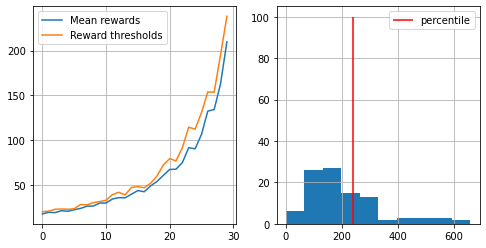

You Win!


In [8]:
n_sessions = 100
percentile = 70
log = []

for i in range(100):
    # generate new sessions
    sessions = [generate_session(env, n_actions, agent) for _ in range(n_sessions)]

    states_batch, actions_batch, rewards_batch = make_batches(sessions)

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    agent.partial_fit(elite_states, elite_actions, range(n_actions))

    show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])

    if np.mean(rewards_batch) > 190:
        print("You Win!")
        break

# Results

In [9]:
from gymnasium.wrappers.record_video import RecordVideo
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, './videos',  episode_trigger = lambda episode_number: True)

sessions = [generate_session(env, n_actions, agent, test=True) for _ in range(5)]
env.close()

/Users/germanarutunov/Projects/ftiad/venv/lib/python3.9/site-packages/gymnasium/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-0.mp4
Moviepy - Building video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-1.mp4
Moviepy - Building video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-2.mp4.
Moviepy - Writing video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-2.mp4
Moviepy - Building video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-3.mp4.
Moviepy - Writing video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-3.mp4
Moviepy - Building video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-4.mp4.
Moviepy - Writing video /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready /Users/germanarutunov/DataspellProjects/RL-course/hw1/videos/rl-video-episode-4.mp4


In [10]:
# show video
from IPython.display import HTML
import os

video_names = list(
    filter(lambda s: s.endswith(".mp4"), os.listdir("./videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./videos/"+video_names[-1]))  # this may or may not be _last_ video. Try other indices

In [11]:
def visualize_mountain_car(env, agent):
    xs = np.linspace(env.min_position, env.max_position, 100)
    vs = np.linspace(-env.max_speed, env.max_speed, 100)
    grid = np.dstack(np.meshgrid(xs, vs)).transpose(1, 0, 2)
    grid_flat = grid.reshape(len(xs) * len(vs), 2)
    probs = agent.predict_proba(grid_flat).reshape(len(xs), len(vs), 3)
    return probs

# Homework

### Deep crossentropy method

By this moment you should have got enough score on [CartPole-v1](https://gymnasium.farama.org/environments/classic_control/cart_pole/) to consider it solved (see the link). It's time to try something harder.

* if you have any trouble with CartPole-v1 and feel stuck, feel free to ask us or your peers for help.

### Tasks (up to 1 point each)

* __2.1__ Pick one of environments: MountainCar-v0 or LunarLander-v2.
  * For MountainCar, get average reward of __at least -150__
  * For LunarLander, get average reward of __at least +50__

See the tips section below, it's kinda important.
__Note:__ If your agent is below the target score, you'll still get most of the points depending on the result, so don't be afraid to submit it.


* __2.2__ Devise a way to speed up training at least 2x against the default version
  * Obvious improvement: use [joblib](https://www.google.com/search?client=ubuntu&channel=fs&q=joblib&ie=utf-8&oe=utf-8) or multiprocessing
  * Try re-using samples from 3-5 last iterations when computing threshold and training
  * Experiment with amount of training iterations and learning rate of the neural network (see params)


### Tips
* Gym page: [MountainCar](https://gymnasium.farama.org/environments/classic_control/mountain_car/), [LunarLander](https://gymnasium.farama.org/environments/box2d/lunar_lander/)
* Sessions for MountainCar may last for 10k+ ticks. Make sure ```t_max``` param is at least 10k.
 * Also it may be a good idea to cut rewards via ">" and not ">=". If 90% of your sessions get reward of -10k and 20% are better, than if you use percentile 20% as threshold, R >= threshold __fails cut off bad sessions__ whule R > threshold works alright.
* _issue with gym_: Some versions of gym limit game time by 200 ticks. This will prevent cem training in most cases. Make sure your agent is able to play for the specified __t_max__, and if it isn't, try `env = gym.make("MountainCar-v0").env` or otherwise get rid of TimeLimit wrapper.
* If you use old _swig_ lib for LunarLander-v2, you may get an error. See this [issue](https://github.com/openai/gym/issues/100) for solution.
* If it won't train it's a good idea to plot reward distribution and record sessions: they may give you some clue. If they don't, call course staff :)
* 20-neuron network is probably not enough, feel free to experiment.

You may find the following snippet useful:

In [18]:
from agent import Agent
from IPython import display
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from utils import show_progress, train
%matplotlib inline

env = gym.make("LunarLander-v2", render_mode="rgb_array").env

n_sessions = 100
percentile = 60
t_max = 10000
log = []
iters = 250
buffer_size = 5

env.reset()
n_actions = env.action_space.n

agent = Agent(
    continuous=False,
    max_iter=iters,
    hidden_layer_sizes=(120, 120),
    learning_rate_init=0.005,
    activation='tanh',
    alpha=0.0005,
    solver='adam',
)

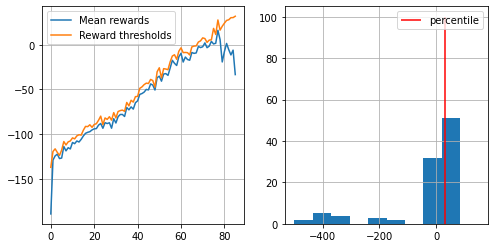

In [ ]:
for rewards_batch, _ in train(env, agent, n_sessions, t_max, iters, buffer_size, percentile, log):
    show_progress(rewards_batch, log, percentile, reward_range=[-500, 150])

    if np.mean(rewards_batch) >= 50:
        print('You won!')
        break


In [ ]:
agent.save('./agent.bin')

In [ ]:
agent = Agent.load('./agent.bin')

In [ ]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs, _ = env.reset()
for t in range(500):
    plt.gca().clear()

    action = np.arange(0, n_actions)[np.argmax(agent.predict_proba(obs.reshape(1, -1)))]
    obs, reward, done, _, _ = env.step(action)

    plt.imshow(env.render())

    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

### Bonus tasks (up to 0.5 points)

* __2.3 bonus__ Solve continuous action space task with `MLPRegressor` or similar.
  * Start with ["Pendulum-v1"](https://gymnasium.farama.org/environments/classic_control/pendulum/) __(score -150)__.
  * Since your agent only predicts the "expected" action, you will have to add noise to ensure exploration.
  * Solve [MountainCarContinuous-v0](https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/) __(score +90)__ or[LunarLanderContinuous-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/) __(score -200)__. Slightly less points for getting some results below solution threshold. Note that discrete and continuous environments may have slightly different rules aside from action spaces.
  * __Please list what you did in anytask submission form__